In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline

In [6]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
### Drop the unnecessary column

df_index.drop(columns = ['Unnamed: 0','year', 'month'], axis=1, inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

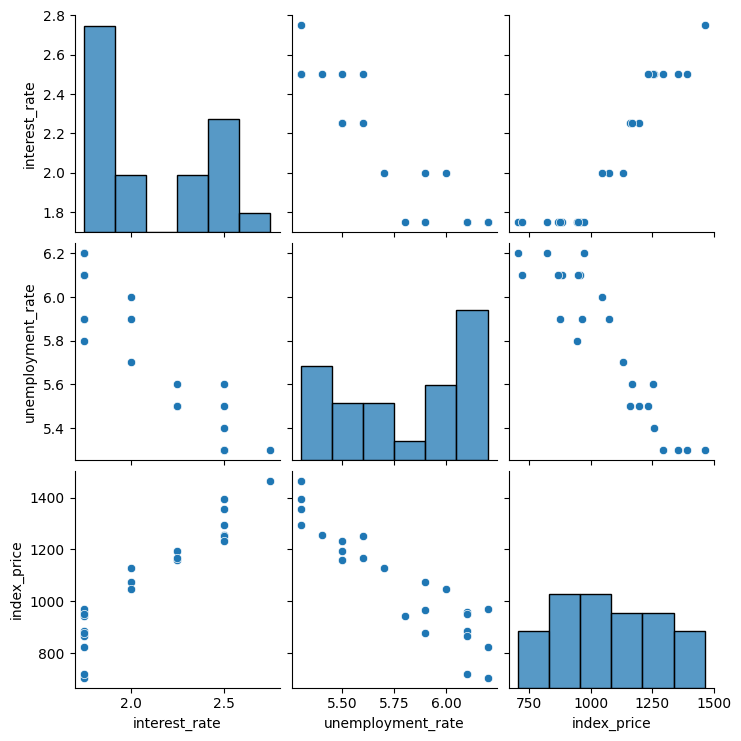

In [11]:
### Visualize the data
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


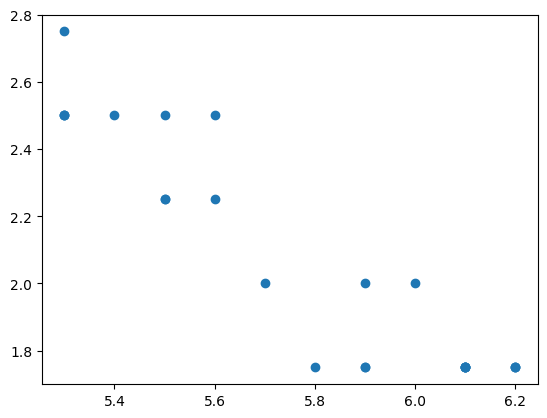

In [15]:
### Visualize the data more clearly

plt.scatter(df_index['unemployment_rate'], df_index['interest_rate'])

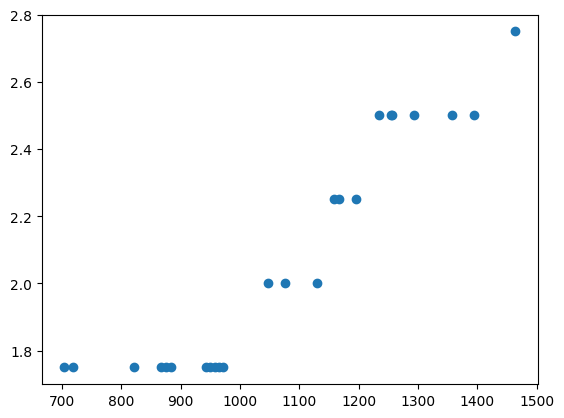

In [16]:
plt.scatter(df_index['index_price'], df_index['interest_rate'])

In [18]:
### Split the data into features and target variable
X = df_index.iloc[:, :-1]  # Features: all columns except the last one
y = df_index['index_price']

In [19]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='index_price', ylabel='interest_rate'>

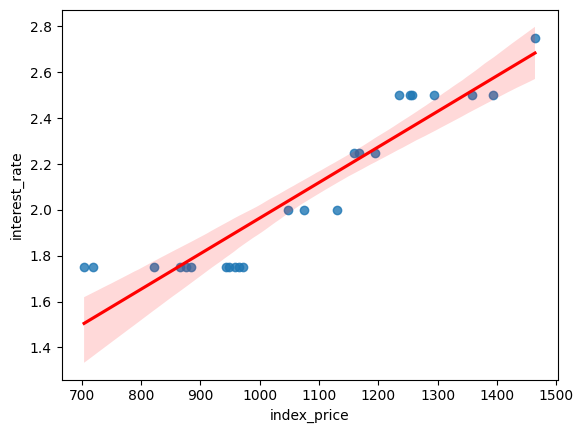

In [26]:
sns.regplot(x=df_index['index_price'], y=df_index['interest_rate'], line_kws={"color": "red"})

In [28]:
### Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [34]:
np.mean(np.abs(cv_scores))

np.float64(5649.115244350759)

In [35]:
### Predict on the test set
y_pred = lin_reg.predict(X_test_scaled)

In [36]:
### Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 59.9357815232356
Mean Squared Error (MSE): 5793.7628877125835
Root Mean Squared Error (RMSE): 76.11677139574815


In [37]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8278978091457141


In [38]:
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Adjusted R-squared: 0.7131630152428567


#### Assumptions Checking

Text(0.5, 1.0, 'Actual vs Predicted Values')

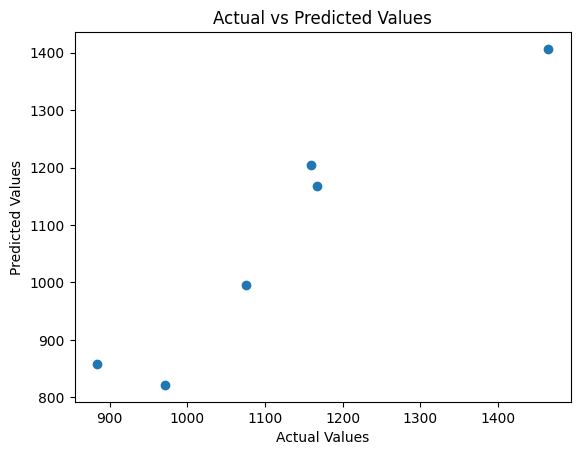

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [43]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

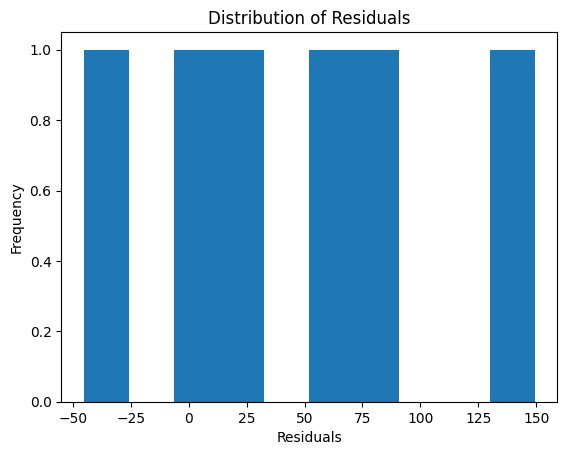

In [46]:

plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

<Axes: xlabel='index_price', ylabel='Density'>

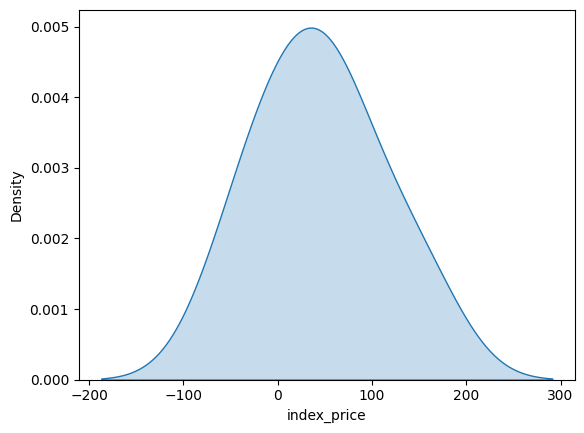

In [51]:
sns.kdeplot(residuals, fill=True)

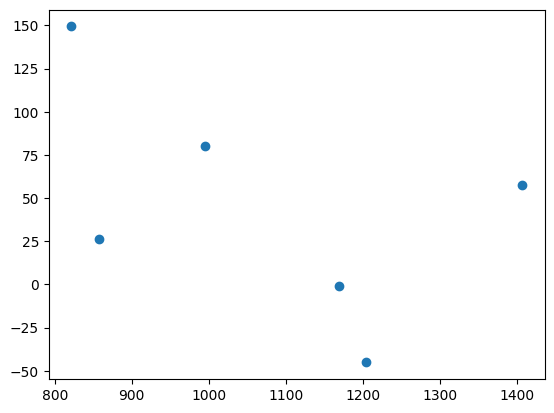

In [52]:
### Create scatter plot of residuals vs. predicted values
plt.scatter(y_pred, residuals)

### Using OLS

In [53]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

In [54]:
predictions = model.predict(sm.add_constant(X_test_scaled))
predictions

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])